<a href="https://colab.research.google.com/github/dominicondigo/Machine-Learning/blob/master/pyproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## This my first python application project to Machine learning using linear regression model
### By dominic Ondigo

## Importing Needed packages

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [6]:
!ls "/content/drive/My Drive"

 10_Free_ML_DS_Books
 165___12
 2839769_1_assignmenttwosemestertwo2018.pdf
 53f6a826-d7df-4b55-81e6-7c23b3fff0a3-original.png
 9781788295758-STATISTICS_FOR_MACHINE_LEARNING.pdf
 age_bp.csv
 andela2018.gdoc
'andela answers.gdoc'
 assignment.ipynb
 athlete_events.csv.zip
 a-whirlwind-tour-of-python.pdf
 awoohhhh.gdraw
 California_cities.csv
'California  Cities.ipynb'
 Camera
'career dev'
 certs
'Colab Notebooks'
 cv2.gdoc
' Data'
'Data Science 2018.gsite'
'Data science material'
 datasetasig2.zip
 dev
 Docs
 DS
'DS books'
'family pics'
 GDG
'Google Photos'
 Hack
 IBM
'Introduction to Machine Learning.gslides'
'Introduction to Machine Learning.pptx'
'[Joel_Grus]_Data_Science_from_Scratch_First_Princ.pdf'
'Lecture 1.gslides'
'Lecture 1.pptx'
' Maths&Statistics.gdoc'
 matlab2010r
'[merrells.space] Udemy - machinelearning'
'ML Books'
'My Resume.gdoc'
 notebook.ipynb
'Online work is work.gdoc'
 pandas-cheat-sheet.pdf
 Pandas_Cheat_Sheet.pdf
'Project (1).gdoc'
 Project.docx
 Project.gdoc
 proj

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

## Understanding the Data

### `salary_data.csv
We have data on salary based on salary_data dataset.we will try to analyze years of experience against salary.

### Reading the data in pandas library

In [0]:
salary=pd.read_csv('/content/drive/My Drive/Salary_Data.csv')

In [10]:
#print the data
print(salary)

    YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0


In [11]:
# take a look at the dataset
salary.head()


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## Data Exploration¶
### Lets first have a descriptive exploration on our data.

In [12]:
#summarize the data
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


Lets select features to explore more.

In [13]:
m_salary=salary[['YearsExperience','Salary']]
m_salary.head(9)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0


we can plot each of these fearues:

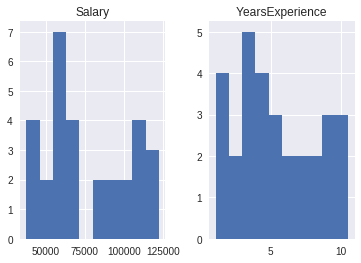

In [14]:
viz = m_salary[['YearsExperience','Salary']]
viz.hist()
plt.show()

Now, lets plot year of experience against salary, to see how linear is their relation:

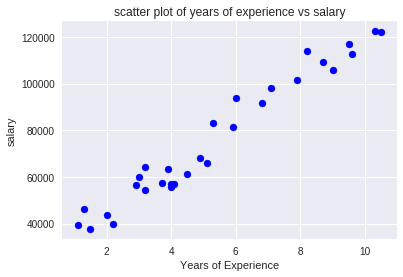

In [15]:
plt.scatter(m_salary.YearsExperience, m_salary.Salary,  color='blue')
plt.xlabel("Years of Experience")
plt.ylabel("salary")
plt.title('scatter plot of years of experience vs salary')
plt.show()

#### Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that we know the outcome of each data point in this dataset, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.



In [0]:
n_dt = np.random.rand(len(salary)) < 0.8
train = m_salary[n_dt]
test = m_salary[~n_dt]

### Simple Regression Model
Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the independent x in the dataset, and the dependent y by the linear approximation. 

#### Train data distribution

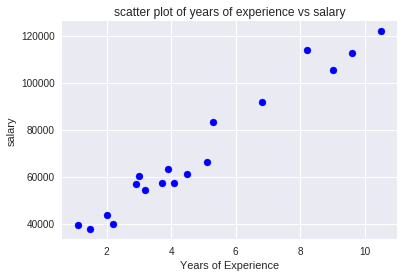

In [17]:
plt.scatter(train.YearsExperience, train.Salary,  color='blue')
plt.xlabel("Years of Experience")
plt.ylabel("salary")
plt.title('scatter plot of years of experience vs salary')
plt.show()

#### Modeling
Using sklearn package to model data.

In [18]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['YearsExperience']])
train_y = np.asanyarray(train[['Salary']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[9409.33154826]]
Intercept:  [25012.99377337]


As mentioned before, __Coefficient__ and __Intercept__ in the simple linear regression, are the parameters of the fit line. 
Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data. 
Notice that all of the data must be available to traverse and calculate the parameters.


#### Plot outputs

we can plot the fit line over the data:

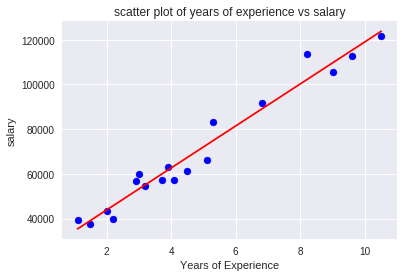

In [19]:
plt.scatter(train.YearsExperience, train.Salary,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Years of Experience")
plt.ylabel("salary")
plt.title('scatter plot of years of experience vs salary')
plt.show()

#### Evaluation
we compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set: 
    - Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.
    - Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.
    - Root Mean Squared Error (RMSE).
    - R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

In [20]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['YearsExperience']])
test_y = np.asanyarray(test[['Salary']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 5109.45
Residual sum of squares (MSE): 39313434.34
R2-score: 0.93
